<center>

---


<h1>CSCI6612 - Visual Analytics</h1>
<h1>Assignment 2</h1>
Fall 2024
</center>

In [ ]:
"""Install the required libraries"""

!python -m pip install --upgrade pip
!pip install pandas
!pip install scikit-learn
!pip install umap
!pip install umap-learn
# !pip install numpy==2.0

## **QUESTION 1**

In this question, you will study the Dash tutorial, and you will experiment with some basic visualization algorithms that you will embed within Dash. You will use the [wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine). Make use of code examples available in the Dash tutorial and Plotly documentation, and clearly reference the URLs of the classes / methods you reused.

Before you start this assignment, study the [Dash in 20 minutes tutorial](https://dash.plotly.com/tutorial) and replicate the examples in a notebook. Skip the examples that require a Dash Enterprise license. Look up the documentation of the methods and libraries used. A particularly useful library is [Plotly Express](https://plotly.com/python/plotly-express/), which supports the most common plot types, with interactive controls. The [Plotly Express cheat sheet](https://www.datacamp.com/cheat-sheet/plotly-express-cheat-sheet) is useful. Aman has put together a [resource document](https://csci6612.notion.site/VA-Course-TA-Suggestions-3d264e87fb1c4ce48a83dc7af11b7fb8?pvs=4) on [Notion](https://www.notion.so/) that he will keep updating as the course advances.   

1. Load the dataset, and convert the loaded data to a pandas dataframe, as it plays well with Plotly Express.





In [1]:
import pandas as pd
from sklearn.datasets import load_wine

wine_data = load_wine()

wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

wine_df['target'] = wine_data.target

print(wine_df.head(5))

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

2. Using Dash, create an interactive tool that allows the user to select a single feature among the set of features and plot #classes+1 histograms, one, over all the data, and one for each class. Arrange the histograms vertically, with the same bins, so that they are easier to visually compare. Using your tool, inspect the histograms of all the features, and describe your observations, in the context of the classification task. Hint: You may find it helpful to use subplots, https://plotly.com/python/subplots/

In [2]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import plotly.io as pio
pio.renderers.default = pio.renderers.default + "+pdf"

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Wine Dataset Histogram Viewer"),
    
    # Dropdown for selecting the feature to plot
    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': feature, 'value': feature} for feature in wine_data.feature_names],
        value='alcohol',
        style={'width': '50%'}
    ),
    
    dcc.Graph(id='histograms')
])

# Callback to update the histograms based on the selected feature
@app.callback(
    Output('histograms', 'figure'),
    [Input('feature-dropdown', 'value')]
)
def update_histograms(selected_feature):
    # Create subplots: one for all data and three for each class
    fig = make_subplots(rows=4, cols=1, shared_xaxes=True, 
                        subplot_titles=('All Data', 'Class 0', 'Class 1', 'Class 2'))
    
    fig.add_trace(
        go.Histogram(x=wine_df[selected_feature], name='All Data'),
        row=1, col=1
    )
    
    for i in range(3):
        fig.add_trace(
            go.Histogram(x=wine_df[wine_df['target'] == i][selected_feature], name=f'Class {i}'),
            row=i+2, col=1
        )
    
    # Update layout
    fig.update_layout(height=800, showlegend=False, title_text=f'Histograms of {selected_feature}',
                      xaxis_title=selected_feature, yaxis_title='Frequency')
    
    # Update bin size and opacity
    fig.update_traces(opacity=0.75, autobinx=False, xbins=dict(start=wine_df[selected_feature].min(), 
                                                               end=wine_df[selected_feature].max(), 
                                                               size=0.5))
    
    return fig


if __name__ == '__main__':
    app.run(debug=True, port=8051)


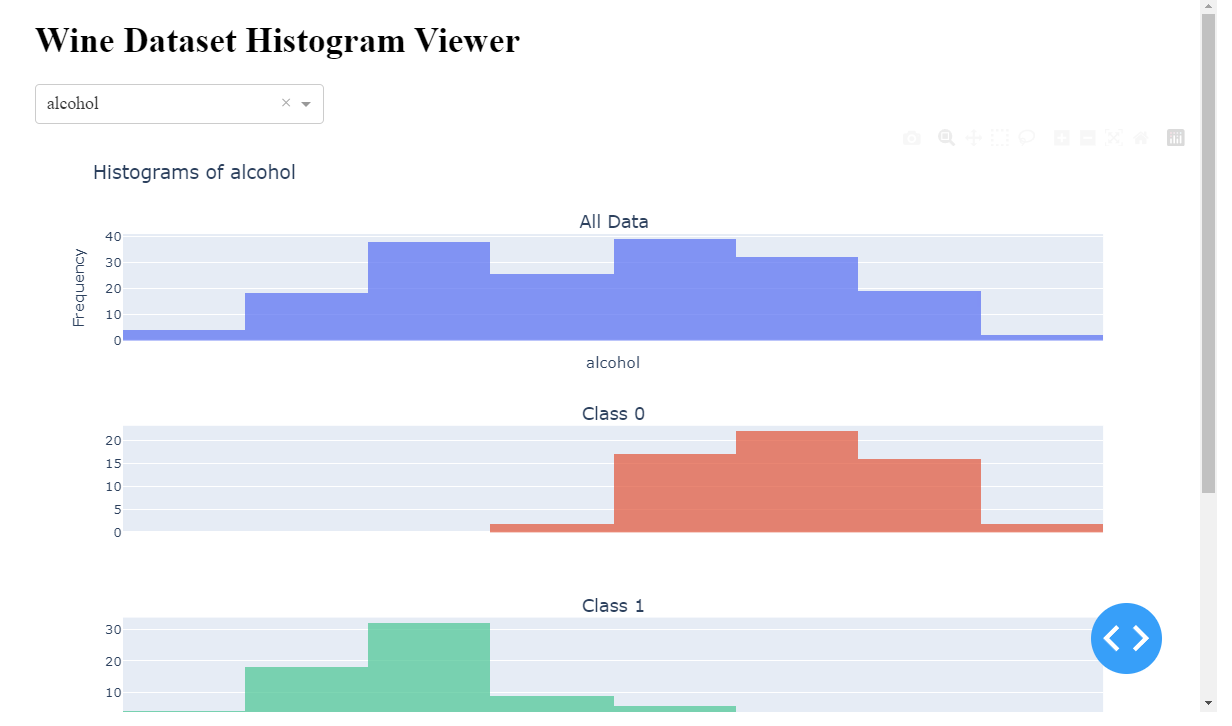

In [6]:
from IPython.display import Image
Image("1.png")

# Screenshot of the histogram output

Answer:

Layout:
- A dropdown (dcc.Dropdown) allows the user to select any feature from the dataset.
- dcc.Graph is used to display the histograms.

Callback:
- The update_histograms function is triggered whenever the user selects a new feature from the dropdown.
- The function creates four histograms (one for all data and three for each class) and arranges them vertically using make_subplots.

Subplots:
- make_subplots: Creates a grid of subplots where each row represents one of the histograms.
- The shared_xaxes=True ensures that all histograms share the same x-axis, making comparison easier.
- The xbins parameter ensures that all histograms use the same bin size, enabling consistency in visual comparison.

Observations:
- Some features show a clear separation between the classes, which indicates that those features may be important for classification.
- For other features, I can observe significant overlap between the classes, suggesting that those features may not provide enough distinguishable information between the classes.

3. In your tool from #2, can you find a way to overlay the histograms of a single feature on the same axes?

In [3]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Wine Dataset Histogram Viewer"),
    
    # Dropdown for selecting the feature to plot
    dcc.Dropdown(
        id='feature-dropdown',
        options=[{'label': feature, 'value': feature} for feature in wine_data.feature_names],
        value='alcohol',
        style={'width': '50%'}
    ),
    
    dcc.Graph(id='histograms')
])

# Callback to update the histograms based on the selected feature
@app.callback(
    Output('histograms', 'figure'),
    [Input('feature-dropdown', 'value')]
)
def update_histograms_overlay(feature):
    fig = px.histogram(wine_df, x=feature, color='target', barmode='overlay', nbins=50)
    return fig


if __name__ == '__main__':
    app.run(debug=True, port=8052)


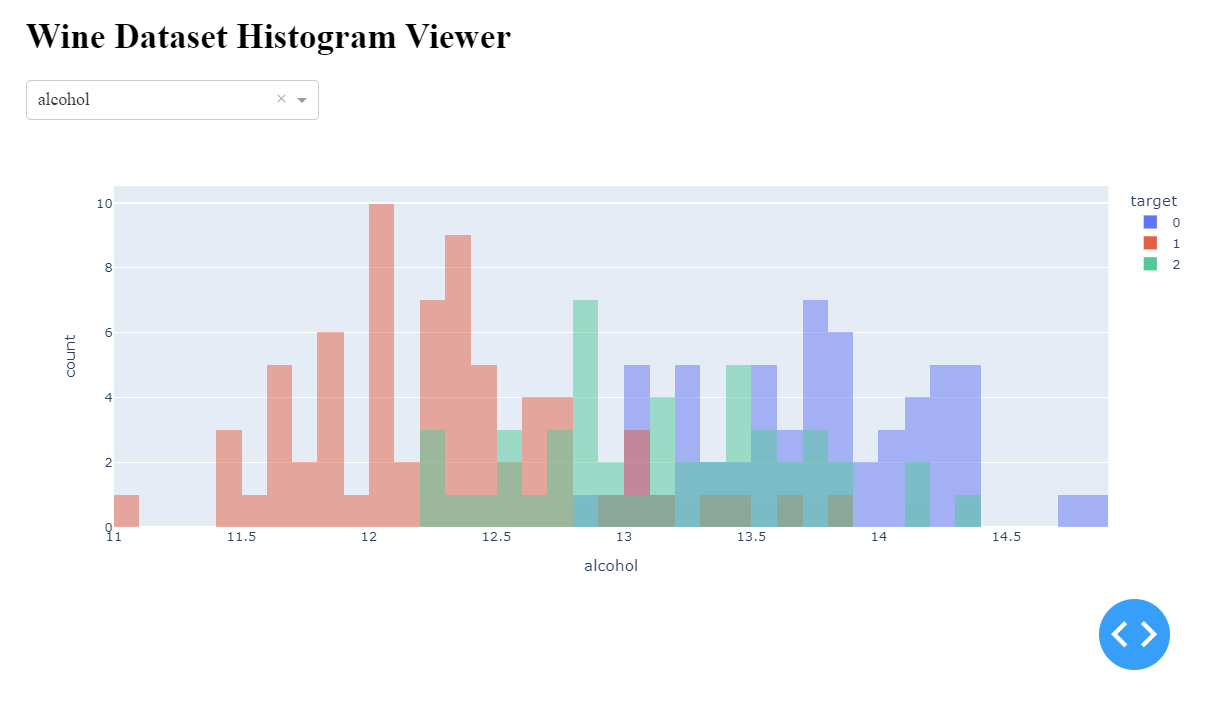

In [7]:
Image("2.png")

# Screenshot of the histogram output

Answer:

To overlay the histograms of a single feature on the same axes, I modified the initial code as follows:

- I changed the callback function to use plotly.express to create an overlay histogram. This allows all classes to be plotted on the same axes, making it easier to compare the distributions.
- Instead of creating subplots for each class, I used the barmode='overlay' parameter in plotly.express.histogram to overlay the histograms of the selected feature.

By making these changes, I was able to overlay the histograms of a single feature on the same axes, providing a clear comparison of the distributions for each class.

4. In your tool from #2, play with the interactive controls offered by Plotly and comment on their usefulness for inspecting histograms of the particular data set.

Answer:

Plotly offers several interactive controls that are very useful for inspecting histograms. For example:

- Hover Information: When I hover over the bars, I get detailed info about the data points, like the count and feature value. This helps me understand the data distribution better.
- Zoom and Pan: I can zoom in and out and pan across the plot. This is useful for focusing on specific areas and examining the data in detail.
- Legend Interaction: I can click on the legend items to show or hide histograms for specific classes. This makes it easier to compare different classes.
- Download Options: I can download the plot as an image, which is handy for reports or presentations.
- Responsive Layout: The layout adjusts to different screen sizes, making it easy to view and interact with the histograms on any device.

These interactive features make it easier for me to explore and analyze the data compared to static plots.

5. Using Dash, create a second interactive tool that allows the user to select a pair of features and displays a scatter plot where the two classes are coloured differently. Select five pairs based on the insights you obtained from the histograms, and describe your observations. Hint: Use **scatter_plot** or **scatter_matrix** in Plotly Express. Use the colour parameter to colour according to the class.

In [4]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Wine Dataset Feature Viwer (Scatter Plot)"),
    
    dcc.Dropdown(
        id='x-feature-dropdown',
        options=[{'label': feature, 'value': feature} for feature in wine_data.feature_names],
        value='alcohol',
        style={'width': '48%', 'display': 'inline-block'}
    ),
    
    dcc.Dropdown(
        id='y-feature-dropdown',
        options=[{'label': feature, 'value': feature} for feature in wine_data.feature_names],
        value='malic_acid',
        style={'width': '48%', 'display': 'inline-block', 'margin-left': '4%'}
    ),
    
    dcc.Graph(id='scatter-plot')
])

@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('x-feature-dropdown', 'value'),
     Input('y-feature-dropdown', 'value')]
)
def update_scatter_plot(x_feature, y_feature):
    fig = px.scatter(
        wine_df, x=x_feature, y=y_feature, 
        color='target',
        title=f'Scatter Plot: {x_feature} vs {y_feature}',
        labels={'target': 'Class'},
        color_continuous_scale=px.colors.qualitative.Plotly
    )
    
    fig.update_layout(
        xaxis_title=x_feature,
        yaxis_title=y_feature,
        legend_title='Class',
        template='plotly'
    )
    
    return fig

if __name__ == '__main__':
    app.run(debug=True, port=8053)


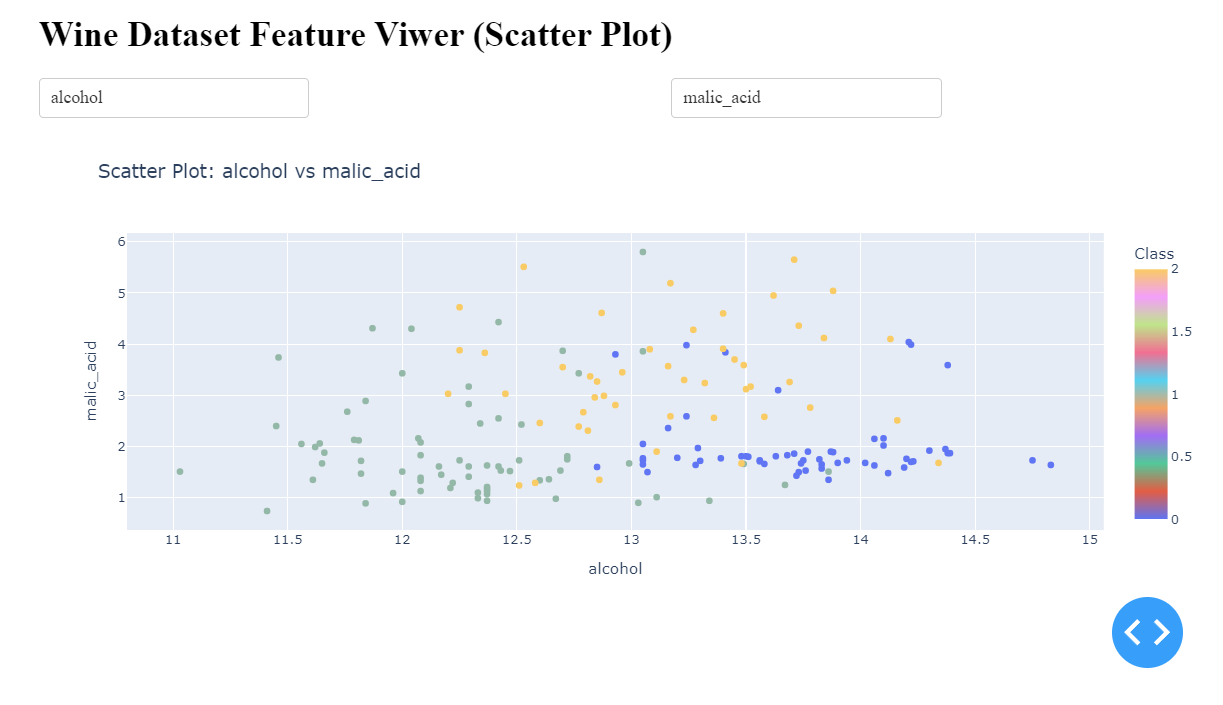

In [8]:
Image("3.png")

# Screenshot of the Scatter Plot output

Answer:

#Took help from ChatGPT and Copilot to understand the features since I lack prior knowledge about any attributes about wines.

Observations:
Alcohol vs. Malic Acid
    I can see that classes have some overlaps and some outliers as well. However, one class have lower malic acid and higher alcohol concentrations, while others show the reverse. This indicates different wine-making processes or grape varieties.

Flavanoids vs. Proanthocyanins
    Here, classes are distinguishable. These features differentiate wines based on phenolic compounds, which impact taste and color. Distinct separation between classes indicates some wines are richer in these compounds.

Total Phenols vs. OD280/OD315
    Classes are clearly distinguishable. Both features relate to phenolic content, and differences indicate higher or lower antioxidant levels in certain classes.

Color Intensity vs. Hue
    These color-related features help differentiate wines with stronger or weaker color profiles, which often correlate with class. Easily distinguishable.

Alcohol vs. Proline
    Alcohol and proline levels differ significantly across classes, as these affect both taste and chemical properties. As a result, distinguishable classes.

6. Familiarize yourself with [UMAP](https://umap-learn.readthedocs.io/en/latest/basic_usage.html), and project the data set into two dimensions. Using Dash, display the projected data as a scatterplot, where the two classes are coloured differently. Comment on how distinct the two classes are in the scatterplot. Repeat for five different UMAP projections. Comment on the visual variability of the results. Discuss similarities and differences with t-SNE from assignment 1.

In [5]:
import umap


app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("UMAP Projection of Wine Dataset"),
    
    dcc.Dropdown(
        id='umap-run-dropdown',
        options=[{'label': f'UMAP Run {i+1}', 'value': i} for i in range(5)],
        value=0,
        style={'width': '48%', 'display': 'inline-block'}
    ),
    
    dcc.Graph(id='umap-scatter-plot')
])

n_runs = 5
umap_projections = []
for _ in range(n_runs):
    umap_model = umap.UMAP(n_components=2, random_state=None)  # Different projections with different random states
    umap_proj = umap_model.fit_transform(wine_df[wine_data.feature_names])
    umap_projections.append(umap_proj)

@app.callback(
    Output('umap-scatter-plot', 'figure'),
    [Input('umap-run-dropdown', 'value')]
)
def update_umap_scatter(run_index):
    # Use the selected UMAP projection for the scatter plot
    umap_proj = umap_projections[run_index]
    
    umap_df = pd.DataFrame(umap_proj, columns=['UMAP_1', 'UMAP_2'])
    umap_df['target'] = wine_df['target']
    
    # Create scatter plot using Plotly Express
    fig = px.scatter(
        umap_df, x='UMAP_1', y='UMAP_2', 
        color='target', 
        title=f'UMAP Projection: Run {run_index + 1}',
        labels={'target': 'Class'},
        color_continuous_scale=px.colors.qualitative.Plotly
    )
    
    fig.update_layout(
        xaxis_title='UMAP Component 1',
        yaxis_title='UMAP Component 2',
        legend_title='Class',
        template='plotly'
    )
    
    return fig


if __name__ == '__main__':
    app.run(debug=True, port=8054)


D:\Dal\Fall24\Codings\6612\A2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



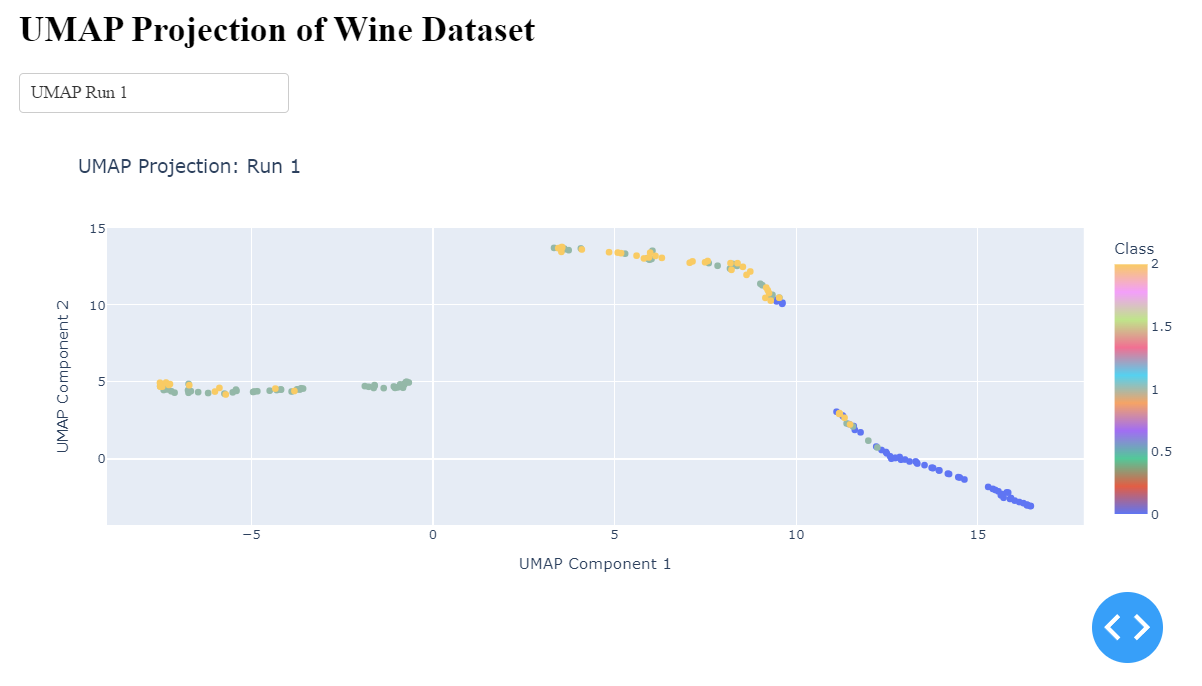

In [9]:
Image("4.png")

# Screenshot of the UMAP Projection output

Answer:

UMAP (Uniform Manifold Approximation and Projection) is a non-linear dimensionality reduction technique similar to t-SNE but often faster and better at capturing the global structure of the data.

- I created five UMAP projections with different random seeds to introduce variability. UMAP reduces the high-dimensional dataset (13 features in the wine dataset) down to two dimensions.
- The scatterplot shows how the points, representing individual wine samples, are distributed in the two-dimensional UMAP space. Each point is colored according to its wine class.

Some observations:

- The scatterplots show different degrees of class separation. In some UMAP projections, the classes are more distinct; in others, there are some overlaps.
- UMAP does a good job of visualizing how different classes (types of wine) are related to each other in the feature space, often producing more interpretable results than t-SNE.
- Across the five UMAP projections, there are slight variations in how the clusters of points are arranged. This is because UMAP is a stochastic algorithm, and different random seeds yield slightly different results.
- However, the overall structure remains relatively consistent across different UMAP runs.
- UMAP shows clearer large-scale structures, allowing me to notice larger distances between clusters of different classes. This contrasts with t-SNE, which sometimes creates clusters that are closer together or spread in more complex shapes, leading to too many overlaps.
- In terms of class distinctness, UMAP provides more interpretable separation compared to t-SNE.
t-SNE shows more compact clusters, focusing on small neighborhoods of similar points, making it more sensitive to local differences within a class.